# Experiment Notebook: {Descriptive Experiment Keywords}

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: ...](#Analysis-1:-...)

# Experiment Summary 

The purpose of this notebook is to...

# Experiment Assumptions

See [assumptions document](../../ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* Import relevant experiment templates
* Create copies of experiments
* Configure and customize experiments 

Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
# Import the setup module:
# * sets up the Python path
# * runs shared notebook configuration methods, such as loading IPython modules
import setup

import copy
import logging
import numpy as np
import pandas as pd
import plotly.express as px

import experiments.notebooks.visualizations as visualizations
from experiments.run import run
from experiments.utils import display_code

time: 946 ms (started: 2022-06-16 11:14:21 -04:00)


In [2]:
# Enable/disable logging
logger = logging.getLogger()
logger.disabled = False

time: 22.5 ms (started: 2022-06-16 11:14:22 -04:00)


In [3]:
# Import experiment templates
import experiments.default_experiment as default_experiment

time: 22.5 ms (started: 2022-06-16 11:14:22 -04:00)


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

time: 26.9 ms (started: 2022-06-16 11:14:22 -04:00)


In [5]:
# Inspect experiment template
display_code(default_experiment)

"""
The default experiment with default model Initial State, System Parameters, and Simulation Configuration.
The defaults are defined in their respective modules:
* Initial State in `model/state_variables.py`
* System Parameters in `model/system_parameters.py`
* Simulation Configuration in `experiments/simulation_configuration.py`
"""

from radcad import Simulation, Experiment, Backend

from model import model
from experiments.simulation_configuration import TIMESTEPS, DELTA_TIME, MONTE_CARLO_RUNS
from model.initialization import setup_initial_state, setup_state_update_blocks


# Create Model Simulation
simulation = Simulation(
    model=model,
    timesteps=TIMESTEPS,
    runs=MONTE_CARLO_RUNS
)
# Create Experiment of single Simulation
experiment = Experiment([simulation])
# Configure Simulation & Experiment engine
simulation.engine = experiment.engine
experiment.engine.backend = Backend.SINGLE_PROCESS
experiment.engine.deepcopy = True
experiment.engine.drop_substeps = True

# Configure simulation hooks
before_subset = lambda context: [
    setup_initial_state(context),
    setup_state_update_blocks(context)
]
simulation.before_subset = before_subset
experiment.before_subset = before_subset

time: 114 ms (started: 2022-06-16 11:14:22 -04:00)


In [6]:
# Create a simulation for each analysis
simulation_1 = copy.deepcopy(default_experiment.experiment.simulations[0])

time: 24.2 ms (started: 2022-06-16 11:14:22 -04:00)


In [32]:
parameter_overrides = {
    "target_stable_backing_ratio": [0.5],
    "rebalancing_period": [int(365/4)], # Set to > timesteps to disable policy
    "compounded_yield": [False],
    "yield_withdrawal_period": [int(365/4)],  # Toggle manually between policies in state update blocks
    "yield_reinvest_period": [int(365/4)],
}

time: 29.9 ms (started: 2022-06-16 11:19:58 -04:00)


In [33]:
# Experiment configuration
simulation_1.model.initial_state.update({})

simulation_1.model.params.update(parameter_overrides)

time: 29.4 ms (started: 2022-06-16 11:20:01 -04:00)


# Analysis 1: Yield Management Policies (Withdraw and Reinvest - see PSUBs)

{Analysis Description}

In [34]:
# Analysis-specific setup

time: 29.4 ms (started: 2022-06-16 11:20:02 -04:00)


In [35]:
# Experiment execution
df, exceptions = run(simulation_1)

2022-06-16 11:20:02,678 - root - INFO - Running experiment
2022-06-16 11:20:02,680 - root - INFO - Setting up initial state
2022-06-16 11:20:02,681 - root - INFO - Starting simulation 0 / run 0 / subset 0
2022-06-16 11:20:03,365 - root - INFO - Experiment complete in 0.6852631568908691 seconds
2022-06-16 11:20:03,365 - root - INFO - Post-processing results
2022-06-16 11:20:03,901 - root - INFO - Post-processing complete in 0.5364968776702881 seconds
time: 1.25 s (started: 2022-06-16 11:20:02 -04:00)


In [36]:
# Post-processing and visualizations

time: 31.2 ms (started: 2022-06-16 11:20:03 -04:00)


## Yield on volatile PCV Deposit

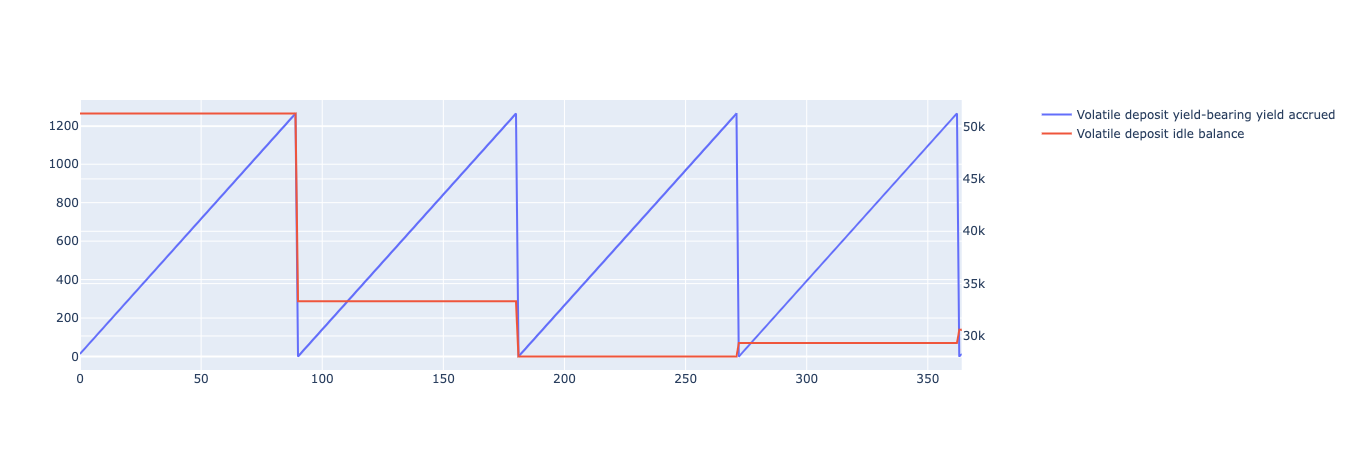

time: 62.8 ms (started: 2022-06-16 11:20:03 -04:00)


In [37]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(y=df.volatile_deposit_yield_bearing_yield_accrued, name="Volatile deposit yield-bearing yield accrued"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=df.volatile_deposit_idle_balance, name="Volatile deposit idle balance"),
    secondary_y=True,
)

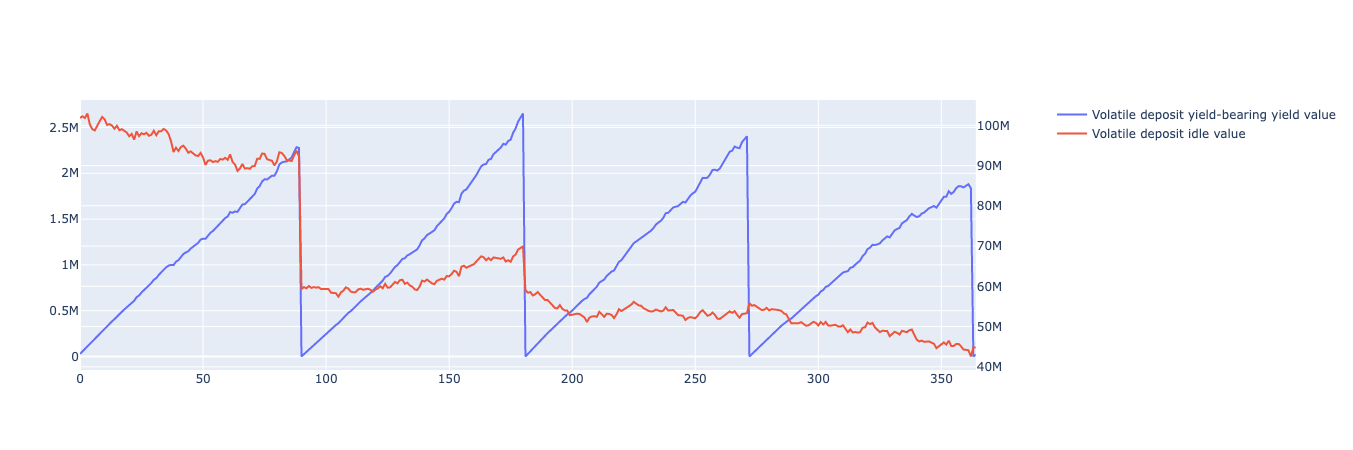

time: 61.9 ms (started: 2022-06-16 11:20:04 -04:00)


In [38]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(y=df.volatile_deposit_yield_bearing_yield_value, name="Volatile deposit yield-bearing yield value"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=df.volatile_deposit_idle_asset_value, name="Volatile deposit idle value"),
    secondary_y=True,
)

## Yield on stable PCV Deposit

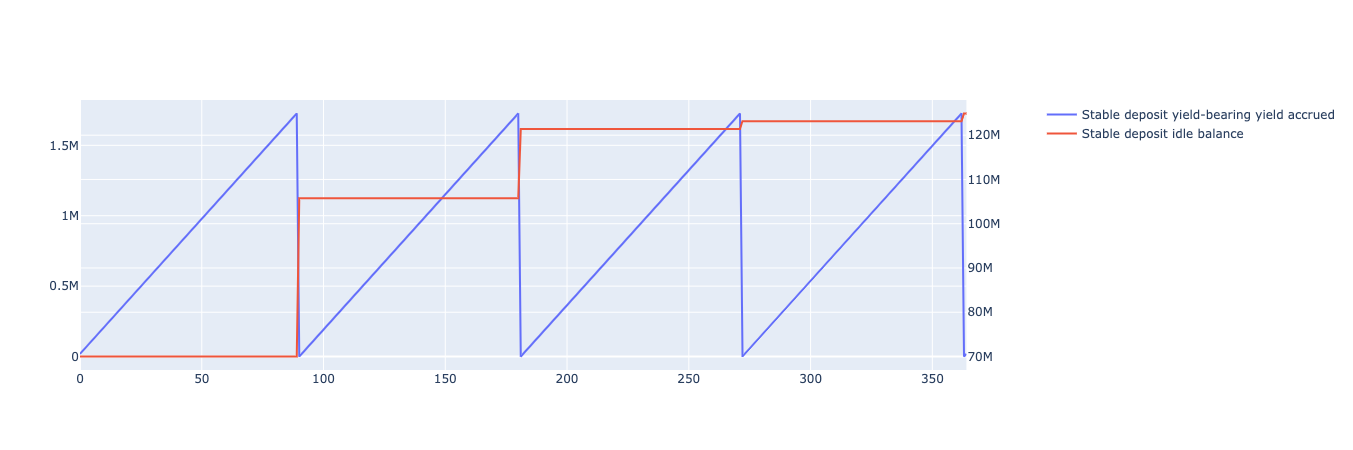

time: 63.8 ms (started: 2022-06-16 11:20:04 -04:00)


In [39]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(y=df.stable_deposit_yield_bearing_yield_accrued, name="Stable deposit yield-bearing yield accrued"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=df.stable_deposit_idle_balance, name="Stable deposit idle balance"),
    secondary_y=True,
)

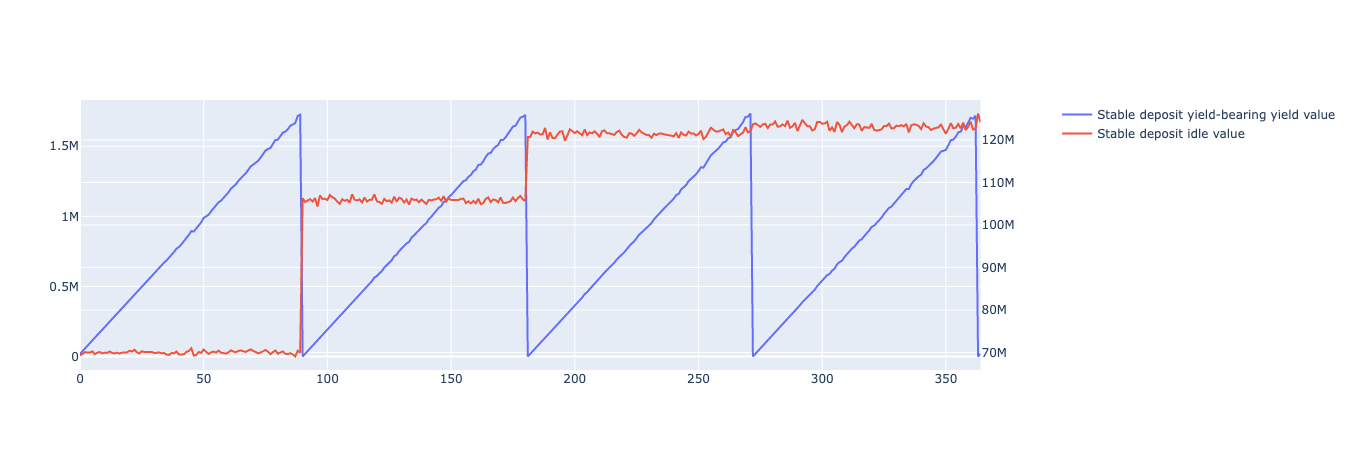

time: 62.9 ms (started: 2022-06-16 11:20:04 -04:00)


In [40]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(y=df.stable_deposit_yield_bearing_yield_value, name="Stable deposit yield-bearing yield value"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(y=df.stable_deposit_idle_asset_value, name="Stable deposit idle value"),
    secondary_y=True,
)

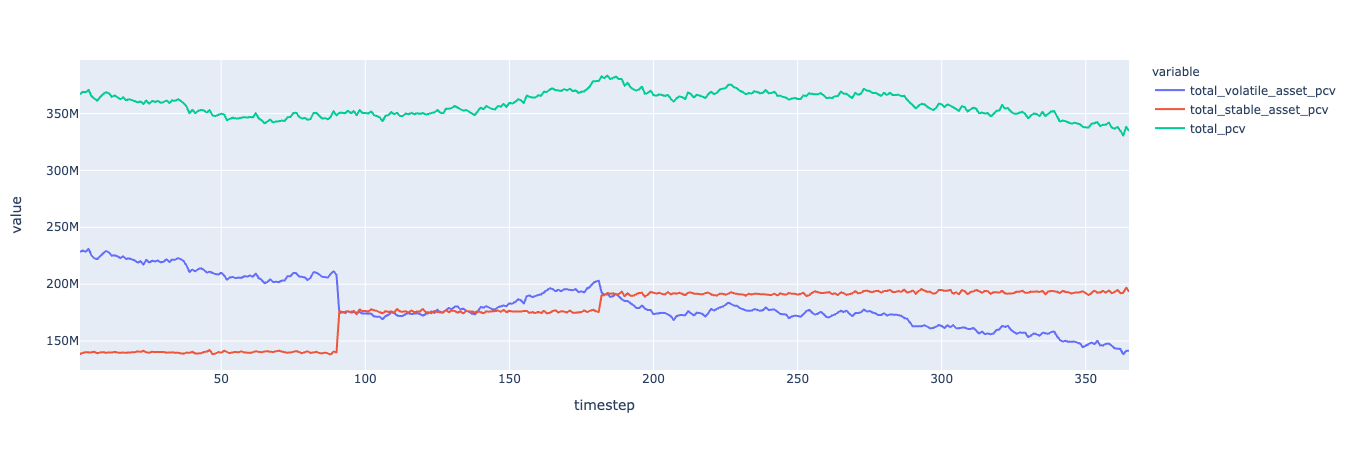

time: 123 ms (started: 2022-06-16 11:20:04 -04:00)


In [41]:
df.plot(
    x='timestep',
    y=['total_volatile_asset_pcv', 'total_stable_asset_pcv', 'total_pcv'],
)

### Simple vs. compound interest

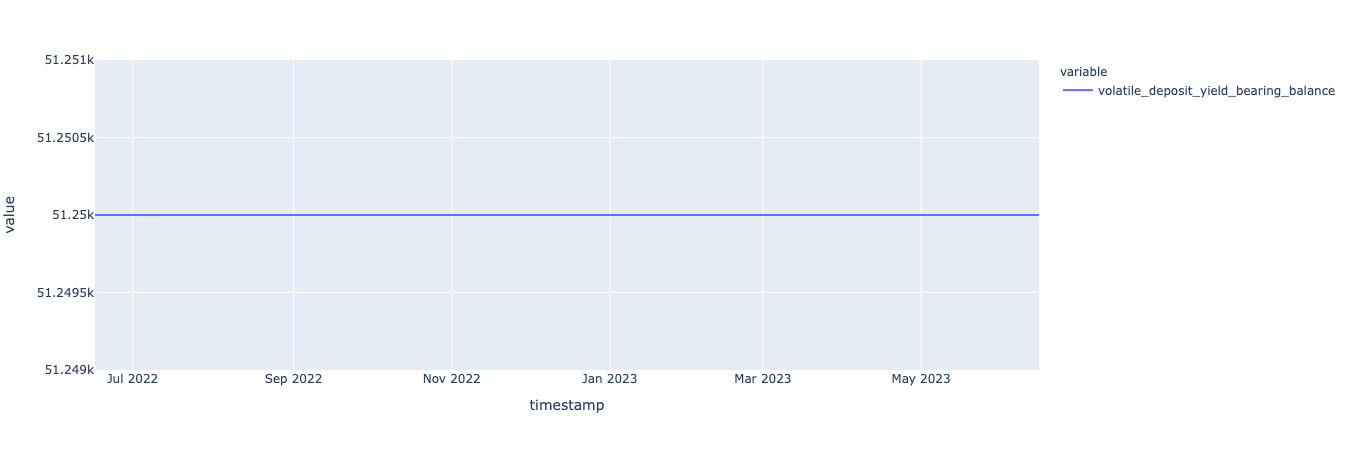

time: 116 ms (started: 2022-06-16 11:20:04 -04:00)


In [42]:
df.volatile_deposit_yield_bearing_balance.plot()

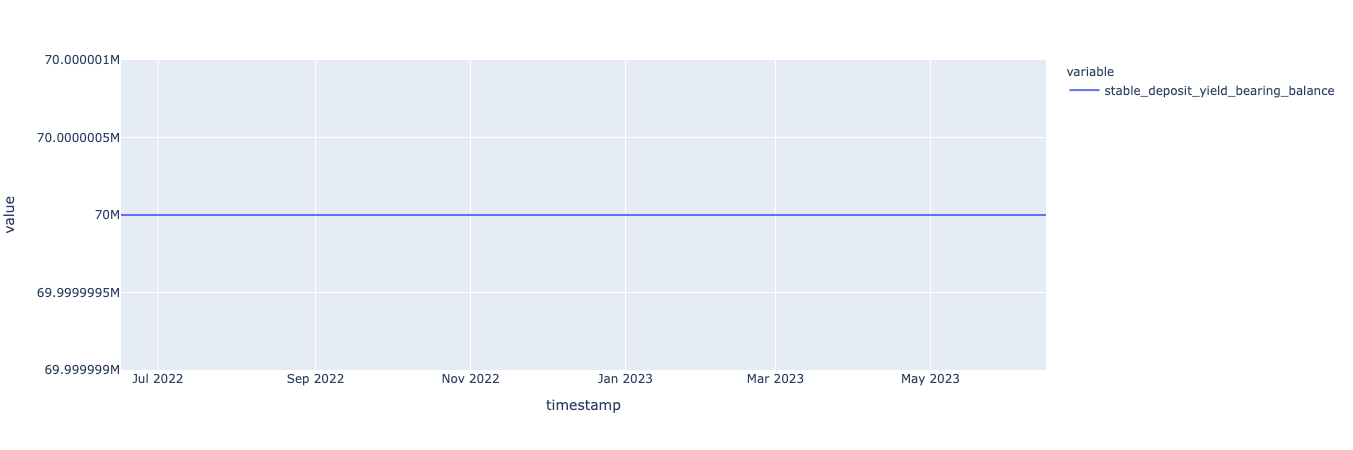

time: 129 ms (started: 2022-06-16 11:20:04 -04:00)


In [43]:
df.stable_deposit_yield_bearing_balance.plot()